<a href="https://colab.research.google.com/github/AditiSuman788/Dictionary-App-Using-JS/blob/main/Copy_of_Another_copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer



In [ ]:
cities_df=pd.read_csv('Cities_data.csv')
cities_df.head()
user_df=pd.read_csv('new.csv')
user_df.head()



,user_ID,Age,Gender,Travel Style,Type,mode of transport,Travel Partner,Places most freuently visited,BestTimeToVisit,ind,Name
0,1,18-25,Male,Family Friendly,Historical,Road,Friends,Mountains,Nov-Feb,Goa,Delhi
1,2,18-25,Male,Luxury,Beach,Trains,Solo Trip,Nature or Sightseeing Places,Nov-Mar,Gangtok,Coorg
2,3,18-25,Female,Family Friendly,City,Trains,Family,Temples/Spiritual Places,Oct-Mar,Jaipur,Rishikesh
3,4,18-25,Male,Adventure,Nature,Trains,Friends,Mountains,Sep-Mar,Varanasi,Coorg
4,5,18-25,Female,Family Friendly,Adventure,Road,Family,Nature or Sightseeing Places,Apr-Jun,Delhi,Varanasi


<ipython-input-137-4e1c51292165>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=user_df, palette='pastel')


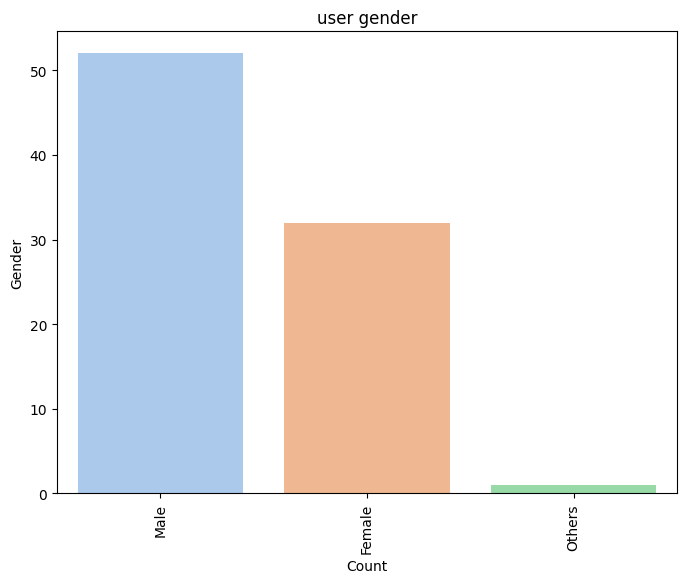

In [ ]:
# user gender distribution

plt.figure(figsize=(8,6))
sns.countplot(x='Gender', data=user_df, palette='pastel')
plt.title("user gender")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.xticks(rotation=90)
plt.show()

<ipython-input-138-eac2d34d1894>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=user_df, palette='pastel')


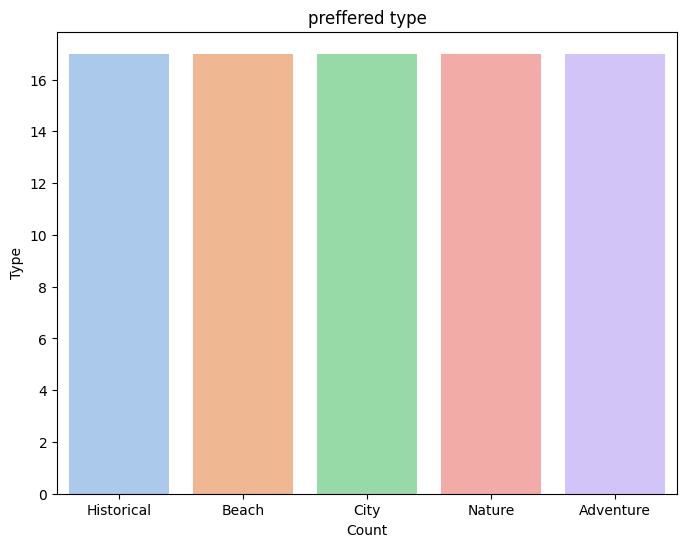

In [ ]:
# preffered type
plt.figure(figsize=(8,6))
sns.countplot(x='Type', data=user_df, palette='pastel')
plt.title("preffered type")
plt.xlabel("Count")
plt.ylabel("Type")
# plt.xticks(rotation=90
plt.show()

<ipython-input-139-d5e3f0f97121>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BestTimeToVisit', data=user_df, palette='pastel')


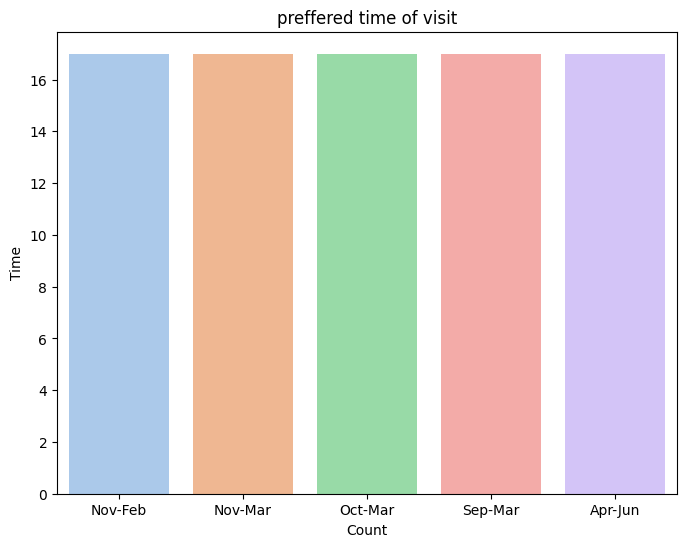

In [ ]:
# preffered time of visit
plt.figure(figsize=(8,6))
sns.countplot(x='BestTimeToVisit', data=user_df, palette='pastel')
plt.title("preffered time of visit")
plt.xlabel("Count")
plt.ylabel("Time")
# plt.xticks(rotation=90
plt.show()

In [ ]:
cities_df['features']= cities_df['About the city (long Description)'] + " " + cities_df['Best Time to visit'] + " " + cities_df['Mode of Transport']
cities_df.head()


,Id,City,Rating,About the city (long Description),Best Time to visit,Mode of Transport,features
0,1,Gangtok,4.6,"Incredibly alluring, pleasantly boisterous and...",Throughout the year,"Road, Train","Incredibly alluring, pleasantly boisterous and..."
1,2,Udaipur,4.6,"Udaipur, the ""City of Lakes,"" stands as a jewe...",October to March,"Road, Train, Flight","Udaipur, the ""City of Lakes,"" stands as a jewe..."
2,3,Gulmarg,4.4,Situated at an altitude of 2730 m above sea le...,October to June,"Road, Train",Situated at an altitude of 2730 m above sea le...
3,4,Agra,4.9,Located on the banks of River Yamuna in Uttar ...,October to March,"Road, Train, Flight",Located on the banks of River Yamuna in Uttar ...
4,5,Andaman and Nicobar,4.6,Replete with turquoise blue water beaches and ...,October to Jun,"Flight, Ship",Replete with turquoise blue water beaches and ...


In [ ]:
Vectorizer=TfidfVectorizer(strip_accents='unicode', analyzer='word',stop_words='english')
city_vector=Vectorizer.fit_transform(cities_df['features'])

# city_vector.toarray()
# city_vector.shape

In [ ]:
indices=pd.Series(cities_df.index,index=cities_df['City'])
indices

,0
City,
Gangtok,0
Udaipur,1
Gulmarg,2
Agra,3
Andaman and Nicobar,4
...,...
Kovalam,66
Madikeri,67
Matheran,68


In [ ]:
cosine_sim=cosine_similarity(city_vector)
cosine_sim



array([[1.        , 0.01431699, 0.0539462 , ..., 0.07330649, 0.05047677,
        0.00719042],
       [0.01431699, 1.        , 0.03977437, ..., 0.10080631, 0.01261348,
        0.03984474],
       [0.0539462 , 0.03977437, 1.        , ..., 0.07064311, 0.02351237,
        0.0134189 ],
       ...,
       [0.07330649, 0.10080631, 0.07064311, ..., 1.        , 0.03819516,
        0.00798266],
       [0.05047677, 0.01261348, 0.02351237, ..., 0.03819516, 1.        ,
        0.06110449],
       [0.00719042, 0.03984474, 0.0134189 , ..., 0.00798266, 0.06110449,
        1.        ]])

In [ ]:
def rec_des(id,cosine_sim=cosine_sim):
  city=user_df.loc[id-1,"Name"]
  ind=indices[city]
  sim_score=list(enumerate(cosine_sim[ind]))
  sim_score=sorted(sim_score,key=lambda x:x[1],reverse=True)
  sim_score=sim_score[1:11]

  # for a in sim_score:
  #   print(cities_df.loc[a[0],["City","Rating","Mode of Transport"]])
  des_indices=[i[0] for i in sim_score]
  reccc=cities_df[['City',"Rating","Mode of Transport"]].iloc[des_indices]
  return reccc

In [ ]:
id=45

des=rec_des(id)
des

,City,Rating,Mode of Transport
24,Jaisalmer,4.4,"Road, Train"
29,Jodhpur,4.3,"Road, Train, Flight"
12,Jaipur,4.8,"Road, Train, Flight"
47,Coimbatore,4.2,"Road, Train, Flight"
61,Coimbatore,4.2,"Road, Train, Flight"
19,Varanasi,4.8,"Road, Train, Flight"
48,Lucknow,4.1,"Road, Train, Flight"
62,Lucknow,4.1,"Road, Train, Flight"
1,Udaipur,4.6,"Road, Train, Flight"
39,Bangalore,4.7,"Road, Train, Flight"


In [ ]:
user_df["preference"]=user_df["Gender"]+" "+user_df["Travel Style"]+" "+  user_df["Type"]+" "+ user_df["mode of transport"]+" "+ user_df["Travel Partner"]+" "+ user_df["Places most freuently visited"]
user_df

,user_ID,Age,Gender,Travel Style,Type,mode of transport,Travel Partner,Places most freuently visited,BestTimeToVisit,ind,Name,preference
0,1,18-25,Male,Family Friendly,Historical,Road,Friends,Mountains,Nov-Feb,Goa,Delhi,Male Family Friendly Historical Road Friends M...
1,2,18-25,Male,Luxury,Beach,Trains,Solo Trip,Nature or Sightseeing Places,Nov-Mar,Gangtok,Coorg,Male Luxury Beach Trains Solo Trip Nature or S...
2,3,18-25,Female,Family Friendly,City,Trains,Family,Temples/Spiritual Places,Oct-Mar,Jaipur,Rishikesh,Female Family Friendly City Trains Family Temp...
3,4,18-25,Male,Adventure,Nature,Trains,Friends,Mountains,Sep-Mar,Varanasi,Coorg,Male Adventure Nature Trains Friends Mountains
4,5,18-25,Female,Family Friendly,Adventure,Road,Family,Nature or Sightseeing Places,Apr-Jun,Delhi,Varanasi,Female Family Friendly Adventure Road Family N...
...,...,...,...,...,...,...,...,...,...,...,...,...
80,81,under 18,Male,Adventure,Historical,Trains,Friends,Temples/Spiritual Places,Nov-Feb,Goa,Andaman and Nicobar,Male Adventure Historical Trains Friends Templ...
81,82,18-25,Male,Adventure,Beach,Trains,Solo Trip,Beaches,Nov-Mar,Gangtok,Munnar,Male Adventure Beach Trains Solo Trip Beaches
82,83,18-25,Male,Family Friendly,City,Road,Friends,Temples/Spiritual Places,Oct-Mar,Jaipur,Darjeeling,Male Family Friendly City Road Friends Temples...
83,84,18-25,Male,Adventure,Nature,Trains,Friends,Temples/Spiritual Places,Sep-Mar,Varanasi,Jaipur,Male Adventure Nature Trains Friends Temples/S...


In [ ]:
user_vector=Vectorizer.fit_transform(user_df['preference'])
# user_vector.toarray()

In [ ]:
user_cosine_sim=cosine_similarity(user_vector)
# user_cosine_sim

In [ ]:
def collabrative_rec(id,user_cosine_sim=user_cosine_sim):

  sim_score=list(enumerate(user_cosine_sim[id-1]))
  sim_score=sorted(sim_score,key=lambda x:x[1],reverse=True)
  sim_score=sim_score[1:6]  # top 5 similar user

  user_indices=[i[0] for i in sim_score] # indices of top 5 similar user
  reccommended=[]
  for i in user_indices:
    reccommended.append(rec_des(i))

  # return pd.DataFrame(reccommended)
  return reccommended

  # return user_df.iloc[user_indices]



In [ ]:
new_ans=collabrative_rec(id)[0]
new_ans

,City,Rating,Mode of Transport
14,Darjeeling,4.8,"Road, Train"
22,Mcleodganj,4.2,Road
37,Dalhousie,4.6,Road
51,Khandala,4.6,"Road, Train"
65,Khandala,4.6,"Road, Train"
25,Kodaikanal,4.0,Road
20,Coorg,4.2,Road
54,Matheran,4.1,"Road, Train"
68,Matheran,4.1,"Road, Train"
5,Manali,4.8,Road
